# Random Forest

In [1]:
import numpy as np
import mltools as ml
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import ShuffleSplit
#%%
Xtr = np.genfromtxt("data/X_train.txt",delimiter=None)
Ytr = np.genfromtxt("data/Y_train.txt",delimiter=None)
Xte = np.genfromtxt("data/X_test.txt",delimiter=None)

Xtr,param = ml.transforms.rescale(Xtr)
Xte,_ = ml.transforms.rescale(Xte,param)

X = Xtr[:50000]
Y = Ytr[:50000]
rs0 = ShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
Xsp0 = rs0.split(X)

XtCV = []
XvCV = []
YtCV = []
YvCV = []
for tr_idx, va_idx in Xsp0:
    XtCV.append(X[tr_idx])
    XvCV.append(X[va_idx])
    YtCV.append(Y[tr_idx])
    YvCV.append(Y[va_idx])

## Random Forest vs MinParent

In [16]:
errTP = []
errVP = []

parents = [2**k for k in range(1,11)]

for pr in parents:
    errti=[]
    errvi=[]
    for i in range(5):
        rfr = RFR(n_estimators=50,max_features=8,min_samples_split=pr)
        rfr.fit(XtCV[0],YtCV[0])
        errti.append(mse(YtCV[0],rfr.predict(XtCV[0])))
        errvi.append(mse(YvCV[0],rfr.predict(XvCV[0])))
    errti = np.array(errti)
    errvi = np.array(errvi)
    errTP.append(np.mean(errti))
    errVP.append(np.mean(errvi))

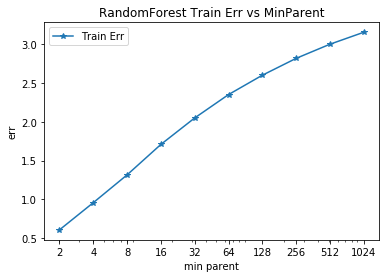

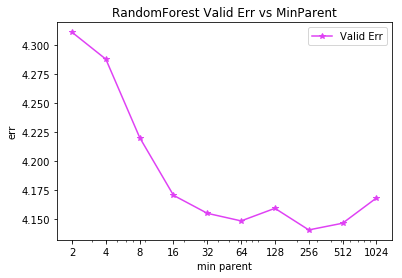

In [17]:
#%%
plt.semilogx(parents, errTP,'*-', label='Train Err')
plt.legend()
plt.title('RandomForest Train Err vs MinParent')
plt.xticks(parents,parents)
plt.xlabel('min parent')
plt.ylabel('err')
plt.savefig('rf_parent_tr',dpi=2000)
plt.show()
#%%
plt.semilogx(parents, errVP,'*-',color='#df41f4',label='Valid Err')
plt.legend()
plt.title('RandomForest Valid Err vs MinParent')
plt.xticks(parents,parents)
plt.xlabel('min parent')
plt.ylabel('err')
plt.savefig('rf_parent_va',dpi=2000)
plt.show()

### Deatiled Analysis on MinParent

In [18]:
errTP = []
errVP = []

parents = list(range(32,633,50))

for pr in parents:
    errti=[]
    errvi=[]
    for i in range(5):
        rfr = RFR(n_estimators=50,max_features=8,min_samples_split=pr)
        rfr.fit(XtCV[0],YtCV[0])
        errti.append(mse(YtCV[0],rfr.predict(XtCV[0])))
        errvi.append(mse(YvCV[0],rfr.predict(XvCV[0])))
    errti = np.array(errti)
    errvi = np.array(errvi)
    errTP.append(np.mean(errti))
    errVP.append(np.mean(errvi))

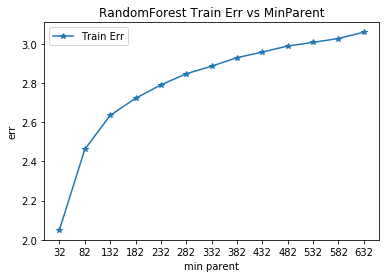

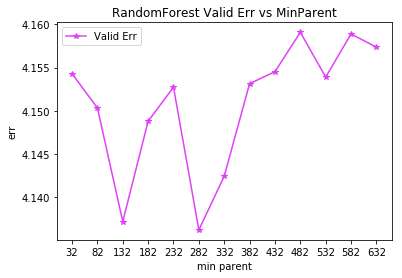

In [20]:
plt.plot(parents, errTP,'*-', label='Train Err')
plt.legend()
plt.title('RandomForest Train Err vs MinParent')
plt.xticks(parents,parents)
plt.xlabel('min parent')
plt.ylabel('err')
plt.savefig('rf_parent_tr',dpi=2000)
plt.show()

plt.plot(parents, errVP,'*-',color='#df41f4',label='Valid Err')
plt.legend()
plt.title('RandomForest Valid Err vs MinParent')
plt.xticks(parents,parents)
plt.xlabel('min parent')
plt.ylabel('err')
plt.savefig('rf_parent_va',dpi=2000)
plt.show()